Included in the R&R

In [6]:
import matplotlib.pyplot as plt

import seaborn as sns

# import numpy as np
# import scipy.stats as st
import pandas as pd
import os
import glob
import json
from simsom.utils import *

# # Styling
plt.style.use("main_stylesheet.mplstyle")
# purple, orange, yellow, pink, blue, cyan
PALETTE = [
    "#550F6B",
    "#F18447",
    "#F8D625",
    "#BC3684",
    "#3863AC",
    "#209B8A",
]

In [7]:
RES_DIR = (
    "/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs"
)
fpath = f"{RES_DIR}/02_3.json.gz"
high = read_json_compressed(fpath)
high.keys()

dict_keys(['phi', 'verbose', 'output_cascades', 'epsilon', 'rho', 'mu', 'alpha', 'theta', 'graph_gml', 'n_threads', 'quality', 'diversity', 'discriminative_pow', 'quality_timestep', 'exposure_timestep', 'age_timestep', 'all_messages', 'feeds_message_ids', 'feeds_shares', 'feeds_ages'])

/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs/03_2.json.gz — timestep: 146
/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs/02_2.json.gz — timestep: 286


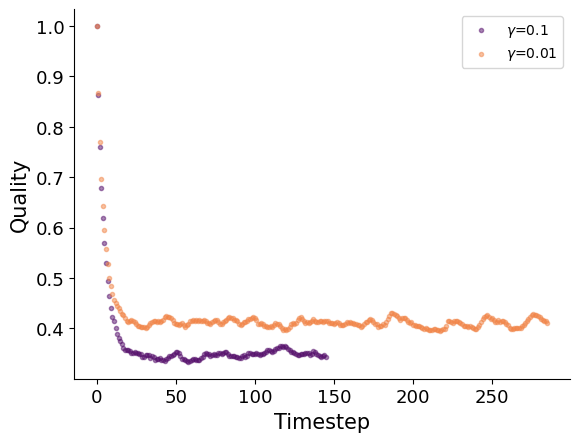

In [10]:
fnames = ["03_2.json.gz", "02_2.json.gz"]
gammas = [0.1, 0.01]
fpaths = [f"{RES_DIR}/{fname}" for fname in fnames]
for idx, (fpath,gamma) in enumerate(zip(fpaths, gammas)):
    results = read_json_compressed(fpath)
    timesteps = len(results["quality_timestep"])
    plt.scatter(
        range(timesteps),
        results["quality_timestep"],
        s=9,
        alpha=0.5,
        color=PALETTE[idx],
        label=f"$\gamma$={gamma}",
    )
    print(f"{fpath} — timestep: {len(results['quality_timestep'])}")
plt.xlabel("Timestep")
plt.ylabel("Quality")
# Remove top and right spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend()
plt.savefig("quality_vs_timestep.png", dpi=300)